# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

ModuleNotFoundError: No module named 'citipy'

## Generate Cities List

In [362]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [363]:

city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

for city in cities:
    query_url = url + city + "&units=imperial&appid=" + weather_api_key
    city_response = requests.get(query_url).json()
    try:
        city_name.append(city_response["name"])
        latitude.append(city_response["coord"]["lat"])
        longitude.append(city_response["coord"]["lon"])
        max_temp.append(city_response["main"]["temp_max"])
        humidity.append(city_response["main"]["humidity"])
        cloudiness.append(city_response["clouds"]["all"])
        wind_speed.append(city_response["wind"]["speed"])
        country.append(city_response["sys"]["country"])
        date.append(city_response["dt"])
    except KeyError:
        pass

In [364]:
#Traversal for each metric needed:

# City          ["name"]
# Lat           ["coord"]["lat"]
# Lng           ["coord"]["lon"]
# Max Temp      ["main"]["temp_max"]
# Humidity      ["main"]["humidity"]
# Cloudiness    ["clouds"]["all"]
# Wind Speed    ["wind"]["speed"]
# Country       ["sys"]["country"]
# Date          ["dt"]

In [367]:
#print log

print("Beginning Data Retrieval")
print('========================')
for index, item in enumerate(cities):
    try:
            print(f'Processing Recond {index} of Set 1 |  {item}')
    except KeyError as error:
            print("City not found. Skipping...")
            pass

print("========================")
print("End Data Retrieval")
print("========================")

Beginning Data Retrieval
Processing Recond 0 of Set 1 |  rikitea
Processing Recond 1 of Set 1 |  puerto ayora
Processing Recond 2 of Set 1 |  tura
Processing Recond 3 of Set 1 |  ushuaia
Processing Recond 4 of Set 1 |  cape town
Processing Recond 5 of Set 1 |  new norfolk
Processing Recond 6 of Set 1 |  constitucion
Processing Recond 7 of Set 1 |  kapaa
Processing Recond 8 of Set 1 |  albany
Processing Recond 9 of Set 1 |  general cepeda
Processing Recond 10 of Set 1 |  taltal
Processing Recond 11 of Set 1 |  karauzyak
Processing Recond 12 of Set 1 |  mahebourg
Processing Recond 13 of Set 1 |  isangel
Processing Recond 14 of Set 1 |  hermanus
Processing Recond 15 of Set 1 |  hilo
Processing Recond 16 of Set 1 |  knysna
Processing Recond 17 of Set 1 |  eyl
Processing Recond 18 of Set 1 |  kaitangata
Processing Recond 19 of Set 1 |  palmetto
Processing Recond 20 of Set 1 |  gorom-gorom
Processing Recond 21 of Set 1 |  tucuman
Processing Recond 22 of Set 1 |  arraial do cabo
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [368]:
#store json output into df
cities_df = pd.DataFrame(city_name)
# metric = ["latitude", "longitude", "max_temp", "humidity", "cloudiness", wind_speed, country, date]
#tried to loop this without success, long way then
cities_df['latitude'] = latitude
cities_df['longitude'] = longitude
cities_df['max_temp'] = max_temp
cities_df['humidity'] = humidity
cities_df['cloudiness'] = cloudiness
cities_df['wind_speed'] = wind_speed
cities_df['country'] = country
cities_df['date'] = date
cities_df = cities_df.rename(columns={0:"city_name"})

#export df to csv
cities_df.to_csv("cities_df2.csv")

In [369]:
cities_df.count()

city_name     556
latitude      556
longitude     556
max_temp      556
humidity      556
cloudiness    556
wind_speed    556
country       556
date          556
dtype: int64

In [370]:
#display the dataframe
cities_df

,city_name,latitude,longitude,max_temp,humidity,cloudiness,wind_speed,country,date
0,Rikitea,-23.12,-134.97,70.56,77,34,11.18,PF,1596687558
1,Puerto Ayora,-0.74,-90.35,66.00,96,81,3.00,EC,1596687558
2,Tura,25.52,90.22,77.07,96,99,5.73,IN,1596687559
3,Ushuaia,-54.80,-68.30,37.40,74,40,11.41,AR,1596687559
4,Cape Town,-33.93,18.42,50.00,93,75,4.70,ZA,1596687442
...,...,...,...,...,...,...,...,...,...
551,Esso,55.93,158.70,61.50,44,93,10.16,RU,1596687782
552,Kunming,25.04,102.72,82.00,64,75,2.24,CN,1596687783
553,Dahra,36.25,0.85,77.00,36,0,3.36,DZ,1596687783
554,Belz,47.68,-3.17,62.01,87,5,3.27,FR,1596687784


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [371]:
cities_df.loc[cities_df['humidity'] > 100]
# no cities with humidity above 100%

,city_name,latitude,longitude,max_temp,humidity,cloudiness,wind_speed,country,date


In [372]:
# Get the indices of cities that have humidity over 100%.
# N/A for this dataset

In [373]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# N/A for this dataset

In [374]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
cities_df.to_csv("cities_df.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [1]:
plt.scatter(latitude,max_temp,alpha=0.85, edgecolors='black')
plt.ylim(min(max_temp) - 10, max(max_temp) + 10)
plt.grid("major")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (F) (%s)" % time.strftime("%x"))
plt.show()
plt.savefig('Fig1.png')

NameError: name 'plt' is not defined

## Latitude vs. Humidity Plot

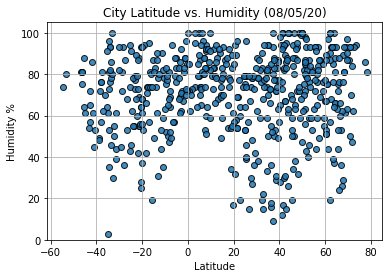

In [376]:
plt.scatter(latitude,humidity,alpha=0.85, edgecolors='black')
plt.ylim(0, max(humidity) + 5)
plt.grid("major")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.show()
plt.savefig('Fig2.png')

## Latitude vs. Cloudiness Plot

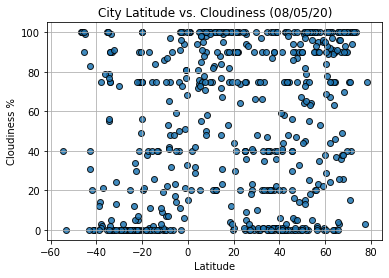

In [377]:
plt.scatter(latitude,cloudiness,alpha=0.85, edgecolors='black')
plt.ylim(-5, max(cloudiness) + 5)
plt.grid("major")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.show()
plt.savefig('Fig3.png')

## Latitude vs. Wind Speed Plot

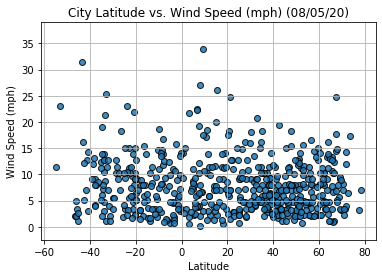

In [378]:
plt.scatter(latitude,wind_speed,alpha=0.85, edgecolors='black')
plt.ylim(-2.5, max(wind_speed)+5)
plt.grid("major")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (mph) (%s)" % time.strftime("%x"))
plt.show()
plt.savefig('Fig4.png')

## Linear Regression

In [379]:
# OPTIONAL: Create a function to create Linear Regression plots
# from scipy.stats import linregress
def regress(x,y,title,xlabel,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_equation, (x.min(), y.min()), fontsize= 15, color = "red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.ylim(min(y) - 10, max(y) + 10)
    plt.xlim(min(x)-5, max(x) + 5)
    print(f"The r-squared value is: {rvalue**2}")
    plt.show()

In [380]:
# Create Northern and Southern Hemisphere DataFrames
nh_df = cities_df.loc[cities_df['latitude'] > 0]
sh_df = cities_df.loc[cities_df['latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.3896736612427048


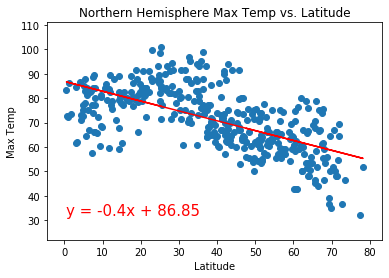

In [381]:
regress(nh_df['latitude'],nh_df['max_temp'], "Northern Hemisphere Max Temp vs. Latitude", "Latitude", "Max Temp")

In [306]:
plt.savefig('nh_lat_v_temp.png')

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.44765543794677576


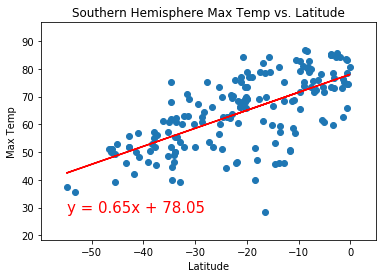

In [382]:
regress(sh_df['latitude'],sh_df['max_temp'], "Southern Hemisphere Max Temp vs. Latitude", "Latitude", "Max Temp") 

In [308]:
plt.savefig('sh_lat_v_temp.png')

<Figure size 432x288 with 0 Axes>

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.001024812584404264


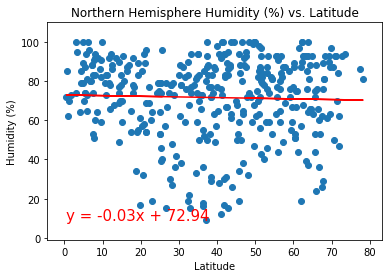

In [383]:
regress(nh_df['latitude'],nh_df['humidity'], "Northern Hemisphere Humidity (%) vs. Latitude", "Latitude", "Humidity (%)") 

In [310]:
plt.savefig('nh_lat_v_humid.png')

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.012345426192894969


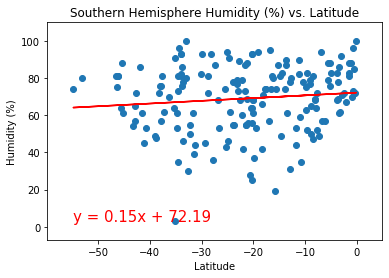

In [384]:
regress(sh_df['latitude'],sh_df['humidity'], "Southern Hemisphere Humidity (%) vs. Latitude", "Latitude", "Humidity (%)") 

In [312]:
plt.savefig('sh_lat_v_humid.png')

<Figure size 432x288 with 0 Axes>

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.002991618182554397


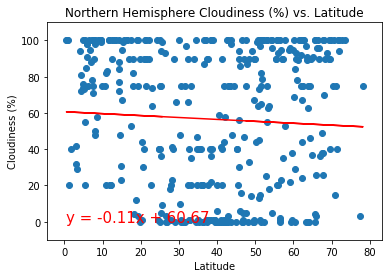

In [385]:
regress(nh_df['latitude'],nh_df['cloudiness'], "Northern Hemisphere Cloudiness (%) vs. Latitude", "Latitude", "Cloudiness (%)") 

In [314]:
plt.savefig('nh_lat_v_clouds.png')

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.0011318195226691025


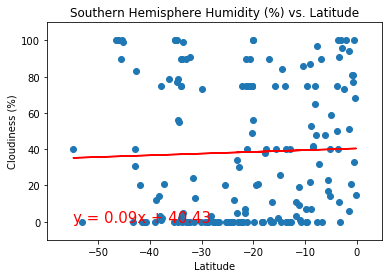

In [389]:
regress(sh_df['latitude'],sh_df['cloudiness'], "Southern Hemisphere Humidity (%) vs. Latitude", "Latitude", "Cloudiness (%)") 


In [316]:
plt.savefig('sh_lat_v_clouds.png')

<Figure size 432x288 with 0 Axes>

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.005619204096598387


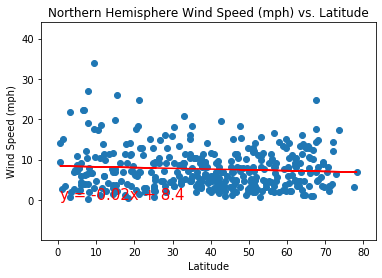

In [387]:
regress(nh_df['latitude'],nh_df['wind_speed'], "Northern Hemisphere Wind Speed (mph) vs. Latitude", "Latitude", "Wind Speed (mph)") 

In [318]:
plt.savefig('nh_lat_v_wind.png')

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.022742274497870626


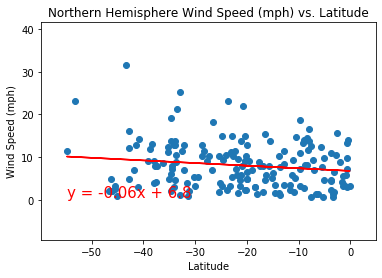

In [388]:
regress(sh_df['latitude'],sh_df['wind_speed'], "Northern Hemisphere Wind Speed (mph) vs. Latitude", "Latitude", "Wind Speed (mph)") 

In [320]:
plt.savefig('sh_lat_v_wind.png')

<Figure size 432x288 with 0 Axes>